## Objects  

In [11]:
#   RUNME.setup
#  This helps set up your kernal's environment in order to avoid errors
import os

from matplotlib import pyplot as plt
import numpy as np
from canopyhydro.configuration import qsm_cols
from canopyhydro.Cylinder import Cylinder, create_cyl
from src.canopyhydro.CylinderCollection import CylinderCollection
from src.canopyhydro.Forester import Forester

# Determines where configuration file is located
# file contains directory info and model input settings
config_file = os.environ[
    "CANOPYHYDRO_CONFIG"
] = f"{os.getcwd()}/canopyhydro_config.toml"
log_config = os.environ["CANOPYHYDRO_LOG_CONFIG"] = f"{os.getcwd()}/logging_config.yml"


[[         nan  0.00000e+00 -1.00000e+00 ...  0.00000e+00  1.00000e-02
   4.01606e-01]
 [         nan  1.00000e+00  0.00000e+00 ...  0.00000e+00  1.00000e-02
   4.01606e-01]
 [         nan  2.00000e+00  1.00000e+00 ...  0.00000e+00  1.00000e-02
   4.01606e-01]
 ...
 [         nan  9.99500e+03  9.99400e+03 ...  0.00000e+00  1.00000e-02
   4.01606e-01]
 [         nan  9.99600e+03  9.99500e+03 ...  0.00000e+00  1.00000e-02
   4.01606e-01]
 [         nan  9.99700e+03  9.99600e+03 ...  0.00000e+00  1.00000e-02
   4.01606e-01]]
{'cyl_id': 1, 'parent_id': 2, 'x': [3, 6], 'y': [4, 7], 'z': [5, 8], 'radius': 9, 'volume': 10, 'length': 12, 'segment_id': 15, 'branch_order': 20, 'reverse_branch_order': 21, 'branch_id': 24}


TypeError: list indices must be integers or slices, not list

In [ ]:

myCyl = Cylinder(
    cyl_id=1.0,
    x=[0,3],
    y=[0,2],
    z=[0,6],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)
print(myCyl)

In [20]:
# Projecting a cylinder onto the XY plane
import numpy as np
from canopyhydro.Cylinder import Cylinder
cyl = Cylinder(1, np.array([0, 1]), np.array([0, 1]), np.array([0, 1]), 1, 1, 0, 0, 1, 0, 0, 0)
cyl.get_projection("XY")
print(cyl.projected_data['XY']['polygon'])
print(cyl.projected_data['XY']['base_vector'])
print(cyl.projected_data['XY']['anti_vector'])
print(cyl.projected_data['XY']['angle'])
print(cyl.projected_data['XY']['area'])

POLYGON ((0.7055547485197222 -0.7086486608663443, 0.6927794439882502 -0.7206122246452861, 0.6793868045462438 -0.7318989317552199, 0.6654090505126061 -0.7424887326410364, 0.6508814456329607 -0.7523657839197849, 0.6358418765269868 -0.761518538618793, 0.6203303971002122 -0.7699397615971714, 0.6043887500439113 -0.777626472292711, 0.5880598778050475 -0.7845798192275877, 0.5713874351273125 -0.7908048926864933, 0.5544153144933113 -0.7963104835647774, 0.5371871946141021 -0.8011087975191887, 0.5197461206122052 -0.8052151342206525, 0.5021341228348492 -0.8086475417192888, 0.4843918794234269 -0.8114264557256392, 0.4665584259537658 -0.8135743330482637, 0.4486709137372394 -0.8151152875793871, 0.4307644168049181 -0.8160747361660723, 0.4128717862361091 -0.81647906052316, 0.3950235493693495 -0.8163552901089949, 0.3772478505606316 -0.8157308096593167, 0.3595704295270235 -0.8146330939104094, 0.3420146329184335 -0.813089470978599, 0.3246014545714764 -0.811126914925819, 0.3073495998873245 -0.80877186724500

### Cylinder

The Cylinder class is used to represent the 3-D cylinders that make up a QSM 

2024.08.26 22:25:02.633 |MainThread   | INFO    | geometry.py:614 -    draw_cylinders_3D() | model - Plotting cylinder in 3D

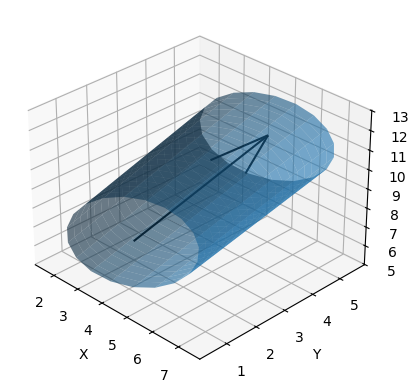

In [5]:
# A trivial example of a Cylinder object


myCyl = Cylinder(
    cyl_id=1.0,
    x=[3, 6],
    y=[2, 4],
    z=[6, 12],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)

fig = myCyl.draw_3D(show=True, draw_vectors=True)

The most important function of Cylinder objects is their ability to return data regarding the projections onto planes. Cylinder objects utilize our custom 'geometry' module to calculate their projections onto the XY, XZ and YZ planes. 

In [ ]:
# Here we show the 3D view and the 3 possible 2D projections of a Cylinder object
myCyl = Cylinder(
    cyl_id=1.0,
    x=[0,3],
    y=[0,2],
    z=[0,6],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)


fig = myCyl.draw_3D(show=False, draw_projections=True)

myCyl.get_projection("XY")
print("'myCyl' as seen from above")
print(
    f"The 'XY' projection of myCyl as an area of {round(myCyl.projected_data['XY']['area'],2)} cm^3"
)
print(
    f"       and the cylinder makes an angle of {round(myCyl.projected_data['XY']['angle'],2)} radians with the XY plane"
)

myCyl.get_projection("XZ")
print(
    f"The 'XZ' projection of myCyl as an area of {round(myCyl.projected_data['XZ']['area'],2)} cm^3"
)
print(
    f"       and the cylinder makes an angle of {round(myCyl.projected_data['XZ']['angle'],2)} radians with the XZ plane"
)

myCyl.get_projection("YZ")
print(
    f"The 'YZ' projection of myCyl as an area of {round(myCyl.projected_data['YZ']['area'],2)} cm^3"
)
print(
    f"       and the cylinder makes an angle of {round(myCyl.projected_data['YZ']['angle'],2)} radians with the YZ plane"
)

In the above 3D representations, the entire surface of cylinder must be calculated, s this may be computationally intensive. \
As such, the 'get_projection' function calculates statistics regarding 2D projections directly instead.

In [ ]:
# The get_projection function allows for the retrieval of
# projection data without the need to define the entire surface of the cylinder


myCyl = Cylinder(
    cyl_id=1.0,
    x=[3, 6],
    y=[2, 4],
    z=[6, 12],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)

print("'myCyl' as seen from above")
myCyl.get_projection("XY")
myCyl.draw(plane="XY")
plt.show()

print("'myCyl' as seen from the 'fromt' of the tree")
myCyl.get_projection("XZ")
myCyl.draw(plane="XZ")
plt.show()

print("'myCyl' as seen from one 'side' of the tree")
myCyl.get_projection("YZ")
myCyl.draw(plane="YZ")
plt.show()

### Cylinder Collection 

Cylinder Collections are just as they sound and, at the most basic level, a Cylinder Collection is defined as a list of 1 or more Cylinder objects. \
Cylinder Collections almost always represent QSM's (or parts of a QSM), and are meant to help users explore their QSMs. \
Below, we demonstrate how one might initialize a cylinder collection using cylinder data (e.g. QSM data) stored in a CSV file.

In [4]:
# Example showing the most basic possible cylinder Collection4
myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
myCollection.from_csv("5_SmallTree.csv")
myCollection.statistics('XY')

# by filtering for cyl_id>100, we are only plotting the
# cylinders that are part of the branch
# myCollection.draw("XZ", filter_lambda=lambda: cyl_id > 50,highlight_lambda=lambda: cyl_id > 100,
#                     save=True, file_name_ext="highlighted_branch_tutorial.svg")  # noqa

# print("XZ Projection of a collection of cylinders")

myCollection.statistics('XY')

2024.08.26 19:28:21.385 |MainThread   | INFO    | CylinderCollection.py:294 -             from_csv() | model - Processing <_io.TextIOWrapper name='./data/input/5_SmallTree.csv' mode='r' encoding='UTF-8'>

2024.08.26 19:28:21.422 |MainThread   | INFO    | CylinderCollection.py:322 -             from_csv() | model - ./data/input/5_SmallTree.csv initialized with 517 cylinders

AttributeError: 'CylinderCollection' object has no attribute 'pSV'


The above also demonstrates a very useful feature available for Cylinder Collections: Filtering. \


In [ ]:
# myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
# myCollection.from_csv('10_MediumCollection.csv')

# by filtering for cyl_id>100, we are only plotting the
# cylinders that are part of the branch
myCollection.draw("XZ", show=False, filter_lambda=lambda: branch_id < 20)
# myCollection.draw('XY',show=False)
# myCollection.draw('YZ',show=False, save=True, file_name_ext = '2d_3d_comparison')
# myCollection.draw('3D',show=False, save = True, file_name_ext = '3d_example', filter_lambda=lambda: branch_id<20)

In [ ]:
myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
myCollection.from_csv("1_TenCyls.csv")

# by filtering for cyl_id>100, we are only plotting the
# cylinders that are part of the branch
myCollection.draw("XZ", show=False)
myCollection.draw("XY", show=False)
myCollection.draw("YZ", show=False, save=True, file_name_ext="2d_3d_comparison")
myCollection.draw(
    "3D",
    show=True,
    save=False,
    file_name_ext="2d_3d_comparison",
    filter_lambda=lambda: cyl_id < 10,
)

print("XZ Projection of a collection of cylinders")

Cylinder Collection objects are often 1-1 with a QSM, and differ from QSMs in that they have been given additional structure via attributes and methods. 

In [ ]:
# Example printing out a png of a cylinder collection, as well as a list of attributes

The most important of these attributes is CylinderCollection.digraph, which is a mathematical graph corresponding the CylinderCollection. \ 
This graph representation is used in tandem with a traversal algoritm to predict which rain partition each cylinder in the collection belongs to

In [ ]:
# Code example printing out a cylinder collection, colored by stem v. drip flow

Alpha shapes are another key attribute used in statistics calculations. \
Alpha shapes represent the estimated area covered by the represented tree's canopy when projected in the XY, XZ or YZ direction. \
**these shapes are particularly important in the calculation of Woody Index (see statistics_calculations for more info)

In [ ]:
# A demonstration showing the calculation and plotting of alpha shapes

The remaining attributes of a CylinderCollection consists primarily of summarry statistics. \
Statistics may be calculated using dedicated functions, or they may be calculated via the overarching 'statistics' function. \
(see statistics_calculations for more info)

In [ ]:
# Demonstrating several options for working with statistics

# A few statistic specific functions

# Results obtained through the bulk statistics function


#

### Forester

Forester objects allow users to conveniently create and manage Cylinder Collections. In particular, Foresters are useful for reading in and processing QSM files.


When a Forester object is created, available file names are read from the default directory, './data/input/'. \
This list of available files can be accessed through the Forester.file_names attribute, as shown below

In [ ]:
# Creating a new Forester object
myForester = Forester()
print(
    f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}"
)

Optionally, a custom path may be passed to the Forester object, In which case, the Forester will look for files in the passed directory instead

In [ ]:
# Passing a custom directory to the Forester object will change the directory attribute
directory = "/data/test/"
myForester = Forester("data/test/")
print(
    f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}"
)

The 'qsm_to_collection' function can be used create CylinderCollections from a specified file.

In [ ]:
# Importing a QSM file as a CylinderCollection
myForester = Forester("data/test/")
myForester.qsm_to_collection("5_SmallTree.csv")

cylCollections = myForester.cylinder_collections
firstCollection = cylCollections[0]

print(
    f"Forester has {len(cylCollections)} CylinderCollection, imported from {cylCollections[0].file_name}"
)

If 'All' is provided as the file name, all of the files in the given directory will be read in as CylinderCollections. \
(Note that this may require a significant amount of memory.)

In [ ]:
# Reading in all files in the directory as collections
myForester.qsm_to_collection("All")
cylCollections = myForester.cylinder_collections
firstCollection = cylCollections[0]
print(
    f"""Forester created {len(cylCollections)} CylinderCollections, imported from the following files 
      {list(map(lambda x: x.file_name,cylCollections))}"""
)

In [ ]:
# Code stored here that may or may not be useful as scraps
# Alternatively, the 'Forester' class can be used
myForester = Forester()
print(
    f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}"
)
# Foresters can ...
## ... use a custom directory
myForester = Forester("data/test/")
print(
    f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}"
)
## ... Read in single QSMs
myForester.qsm_to_collection("5_SmallTree.csv")
print(f"Forester has {len(myForester.cylinder_collections)} CylinderCollections")
# .. or read in all files in a directory
myForester.qsm_to_collection("All")
print(
    f"""Forester created {len(myForester.cylinder_collections)} CylinderCollections,"""
)

In [ ]:
forest = Forester(test_input_dir)
forest.get_file_names()
forest.qsm_to_collection(file_name="3_HappyPathWTrunk.csv")
collection = forest.cylinder_collections[0]
collection.project_cylinders("XY")
collection.initialize_digraph_from(in_flow_grade_lim=-0.16)
collection.find_flow_components()
print("finished_find_flow_components")
collection.calculate_flows()
pickle_collection(collection)


# Configuration 

There are many optional configuration options, but there are only a few that are **necessary** to adjust/check \
to ensure the code runs as expected. \
The default configuration file can be be found at '/CanopyHydrodynamics/src/canopyhydro/user_def_config.toml'. \
At this time functionality changes must be made to this file (e.g. a custom file location cannot be set)

## QSM File structre 
The [qsm] section details the column numbers in which each variable is stored in the input file. To read in this file correctly, 
the following columns are required, and each row in the QSM must have a corresponding value for each:
        - cyl_id
        - parent_id
        - x (specify two columns as an array, one for x0 another for x1)
        - y (specify two columns as an array, one for y0 another for y1)
        - z (specify two columns as an array, one for z0 another for z1)
        - radius
        - volume
        - length
the below additional columns are required as well but can be left blank in the input file:
        - branch_order
        - reverse_branch_order
        - segment_id
## Model Parameters
More detail on these parameters can be found in the documentation. For now, all you need to ensure is that both 
variables have an integer value
- min_len_drip_flow
    - must be > 0
- min_flow_grade_lim
    - must be > -pi/2 and 
    
## Directories 
root_dir       
input_dir      
output_dir     
test_input_dir 